# Simple load using API

In [ ]:
import dlt
from dlt.sources.helpers import requests

@dlt.resource(table_name="photos", write_disposition="replace")
def get_photos():
    url = "https://jsonplaceholder.typicode.com/photos"
    response = requests.get(url)
    response.raise_for_status()
    yield response.json()

pipeline = dlt.pipeline(
    pipeline_name='photos_pipeline',
    destination='duckdb',  # replace with your desired destination
    dataset_name='photos_data',
)

load_info = pipeline.run(get_photos)
print(load_info)

Pipeline photos_pipeline load step completed in 0.76 seconds
1 load package(s) were loaded to destination duckdb and into dataset photos_data
The duckdb destination used duckdb:////content/photos_pipeline.duckdb location to store data
Load package 1707630703.2272375 is LOADED and contains no failed jobs


In [ ]:
import duckdb
# show the outcome

conn = duckdb.connect(f"{pipeline.pipeline_name}.duckdb")

# let's see the tables
conn.sql(f"SET search_path = '{pipeline.dataset_name}'")
print('Loaded tables: ')
display(conn.sql("show tables"))


print("\n\n\n Rides table below: Note the times are properly typed")
persons = conn.sql("SELECT * FROM photos").df()
display(persons)

Loaded tables: 


┌─────────────────────┐
│        name         │
│       varchar       │
├─────────────────────┤
│ _dlt_loads          │
│ _dlt_pipeline_state │
│ _dlt_version        │
│ photos              │
└─────────────────────┘




 Rides table below: Note the times are properly typed


,album_id,id,title,url,thumbnail_url,_dlt_load_id,_dlt_id
0,1,1,accusamus beatae ad facilis cum similique qui ...,https://via.placeholder.com/600/92c952,https://via.placeholder.com/150/92c952,1707630703.2272375,aI0W2VVi25BSVQ
1,1,2,reprehenderit est deserunt velit ipsam,https://via.placeholder.com/600/771796,https://via.placeholder.com/150/771796,1707630703.2272375,742/HEt1h6Ek2g
2,1,3,officia porro iure quia iusto qui ipsa ut modi,https://via.placeholder.com/600/24f355,https://via.placeholder.com/150/24f355,1707630703.2272375,u/APrqQUVDntGQ
3,1,4,culpa odio esse rerum omnis laboriosam volupta...,https://via.placeholder.com/600/d32776,https://via.placeholder.com/150/d32776,1707630703.2272375,4eVFX9PQYAu5Eg
4,1,5,natus nisi omnis corporis facere molestiae rer...,https://via.placeholder.com/600/f66b97,https://via.placeholder.com/150/f66b97,1707630703.2272375,HI/G10RUhRBrrg
...,...,...,...,...,...,...,...
4995,100,4996,voluptatem ab aliquam dolorum vel voluptas qui...,https://via.placeholder.com/600/b3db9a,https://via.placeholder.com/150/b3db9a,1707630703.2272375,MJolSktCT80nDA
4996,100,4997,sunt amet autem exercitationem fuga consequatur,https://via.placeholder.com/600/13454b,https://via.placeholder.com/150/13454b,1707630703.2272375,XApvC/Ob9ytAWg
4997,100,4998,qui quo cumque distinctio aut voluptas,https://via.placeholder.com/600/315aa6,https://via.placeholder.com/150/315aa6,1707630703.2272375,Z/Cg//n+hxqv7w
4998,100,4999,in voluptate sit officia non nesciunt quis,https://via.placeholder.com/600/1b9d08,https://via.placeholder.com/150/1b9d08,1707630703.2272375,/EaZSVbEDdsWrg


```
❯ dlt pipeline photos_pipeline show
Found pipeline photos_pipeline in /Users/muradarfanyan/.dlt/pipelines

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://192.168.0.100:8502

```


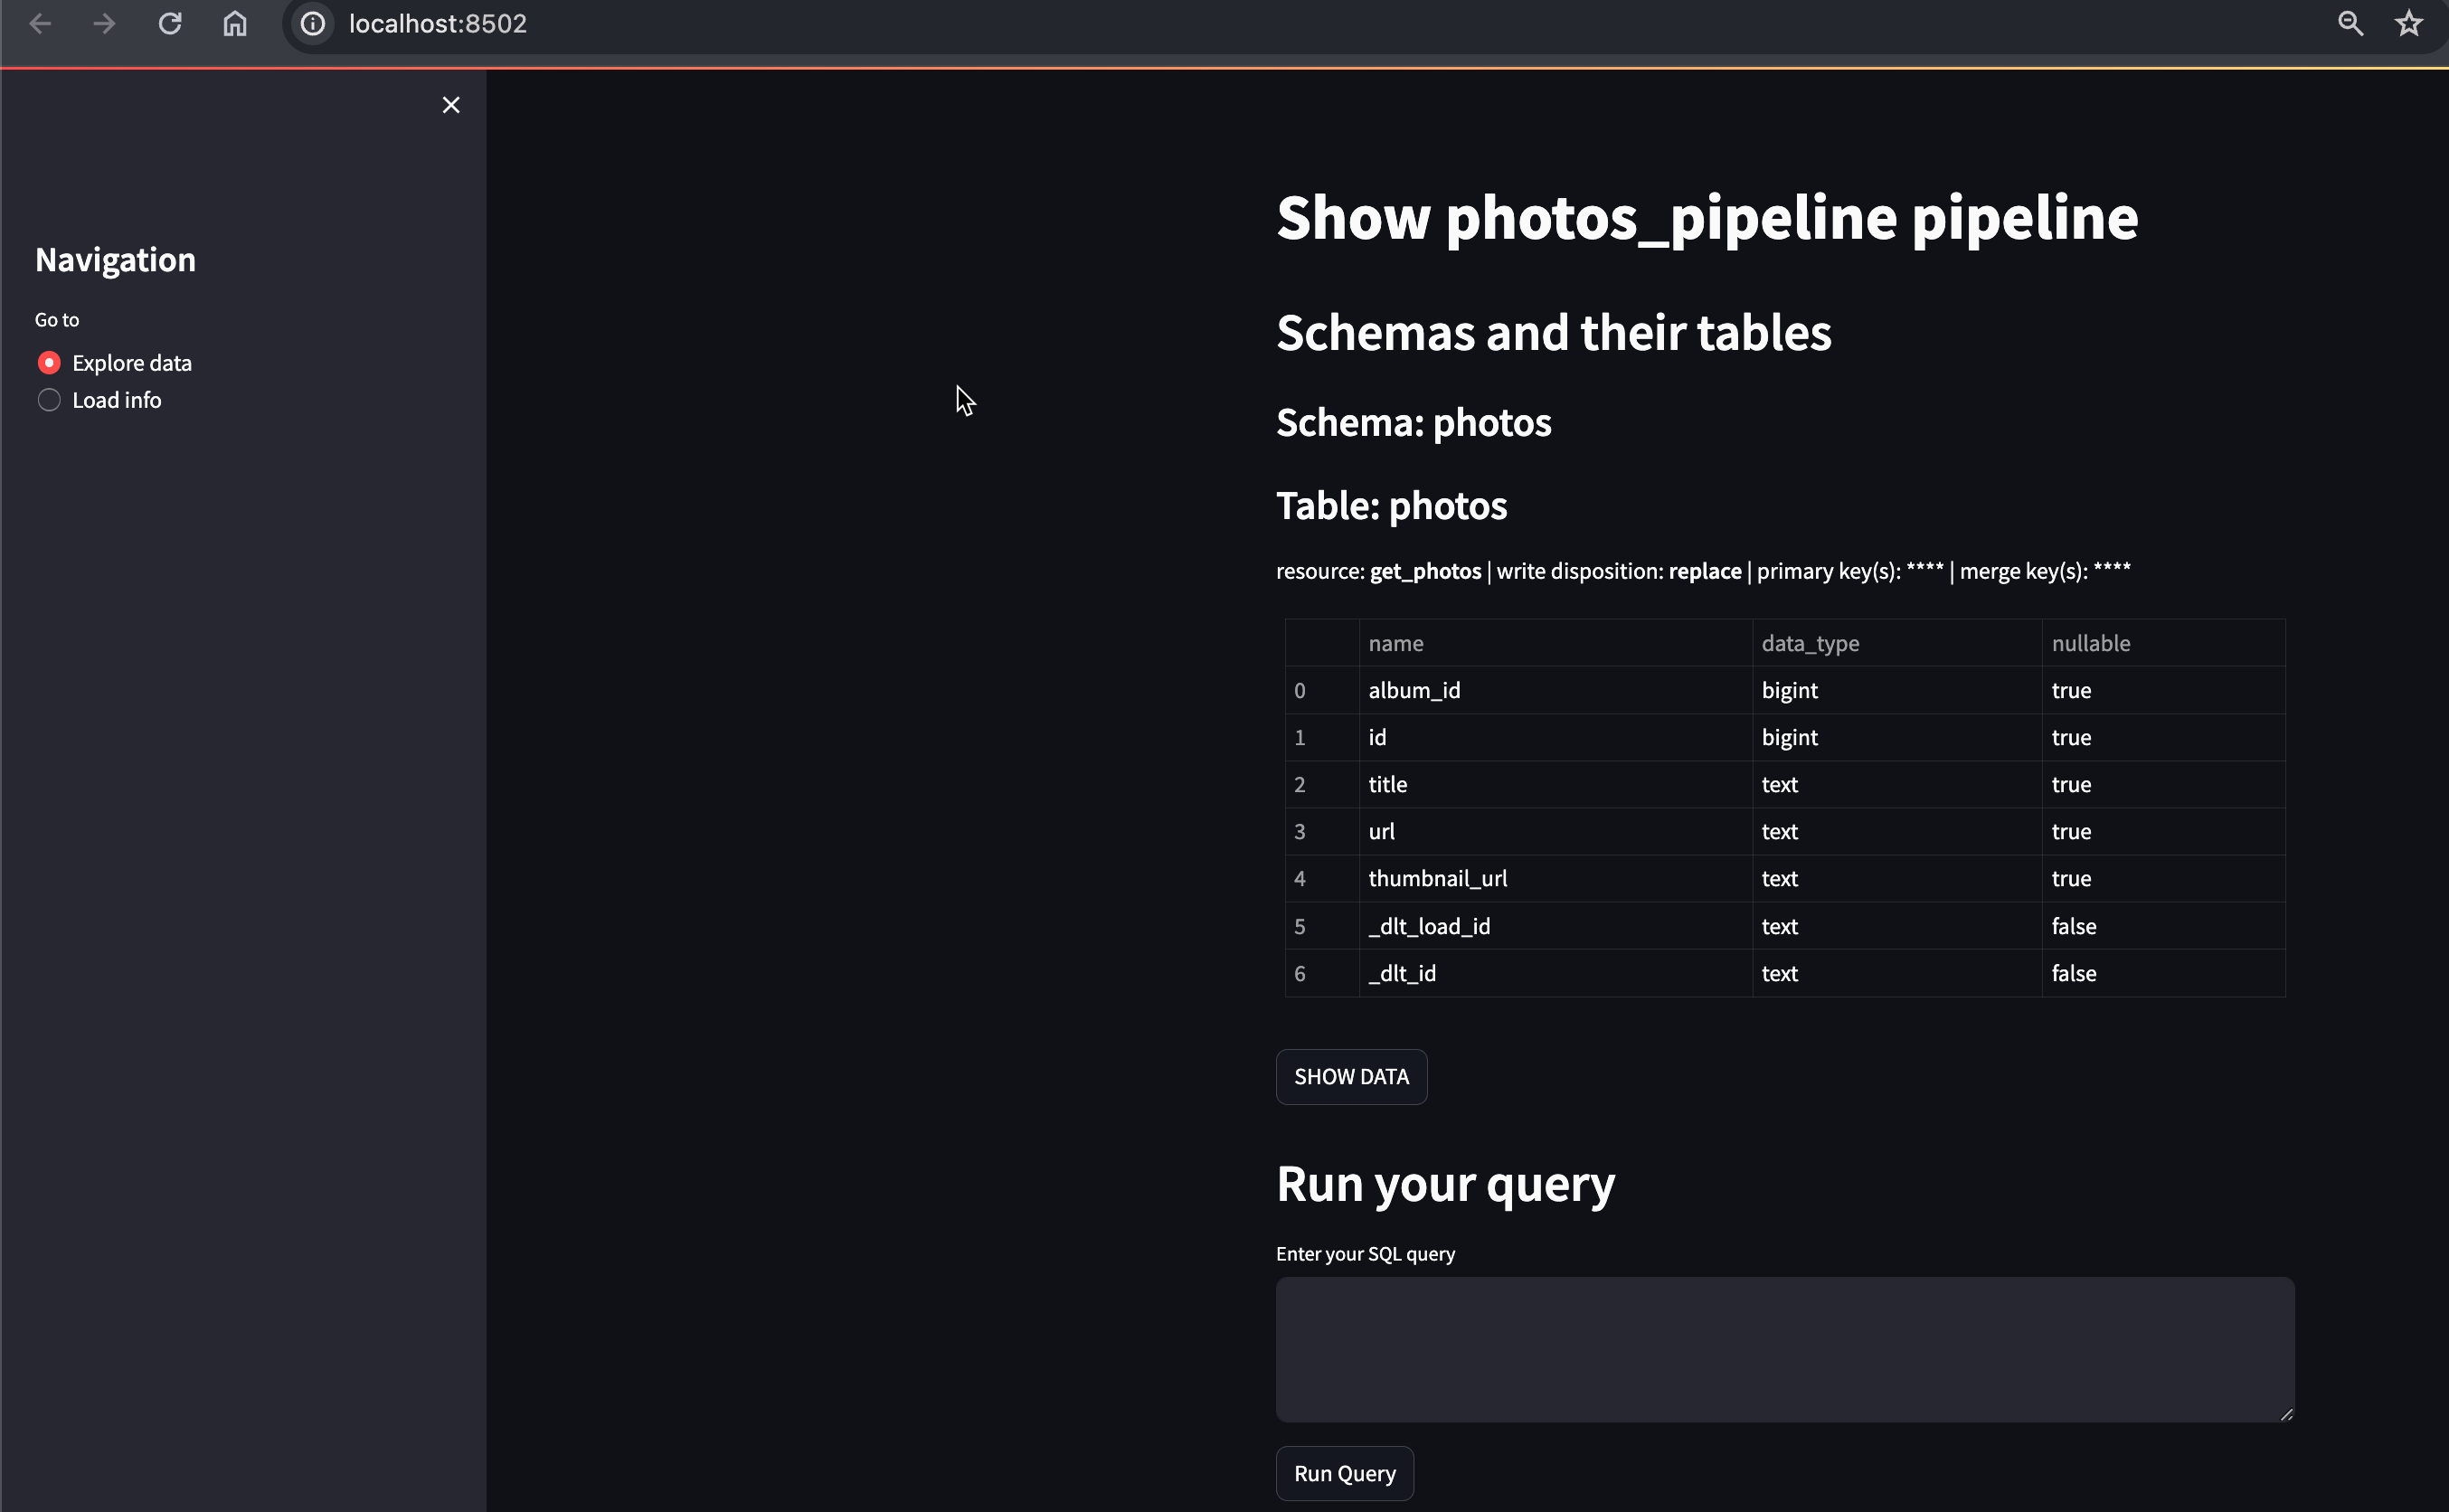

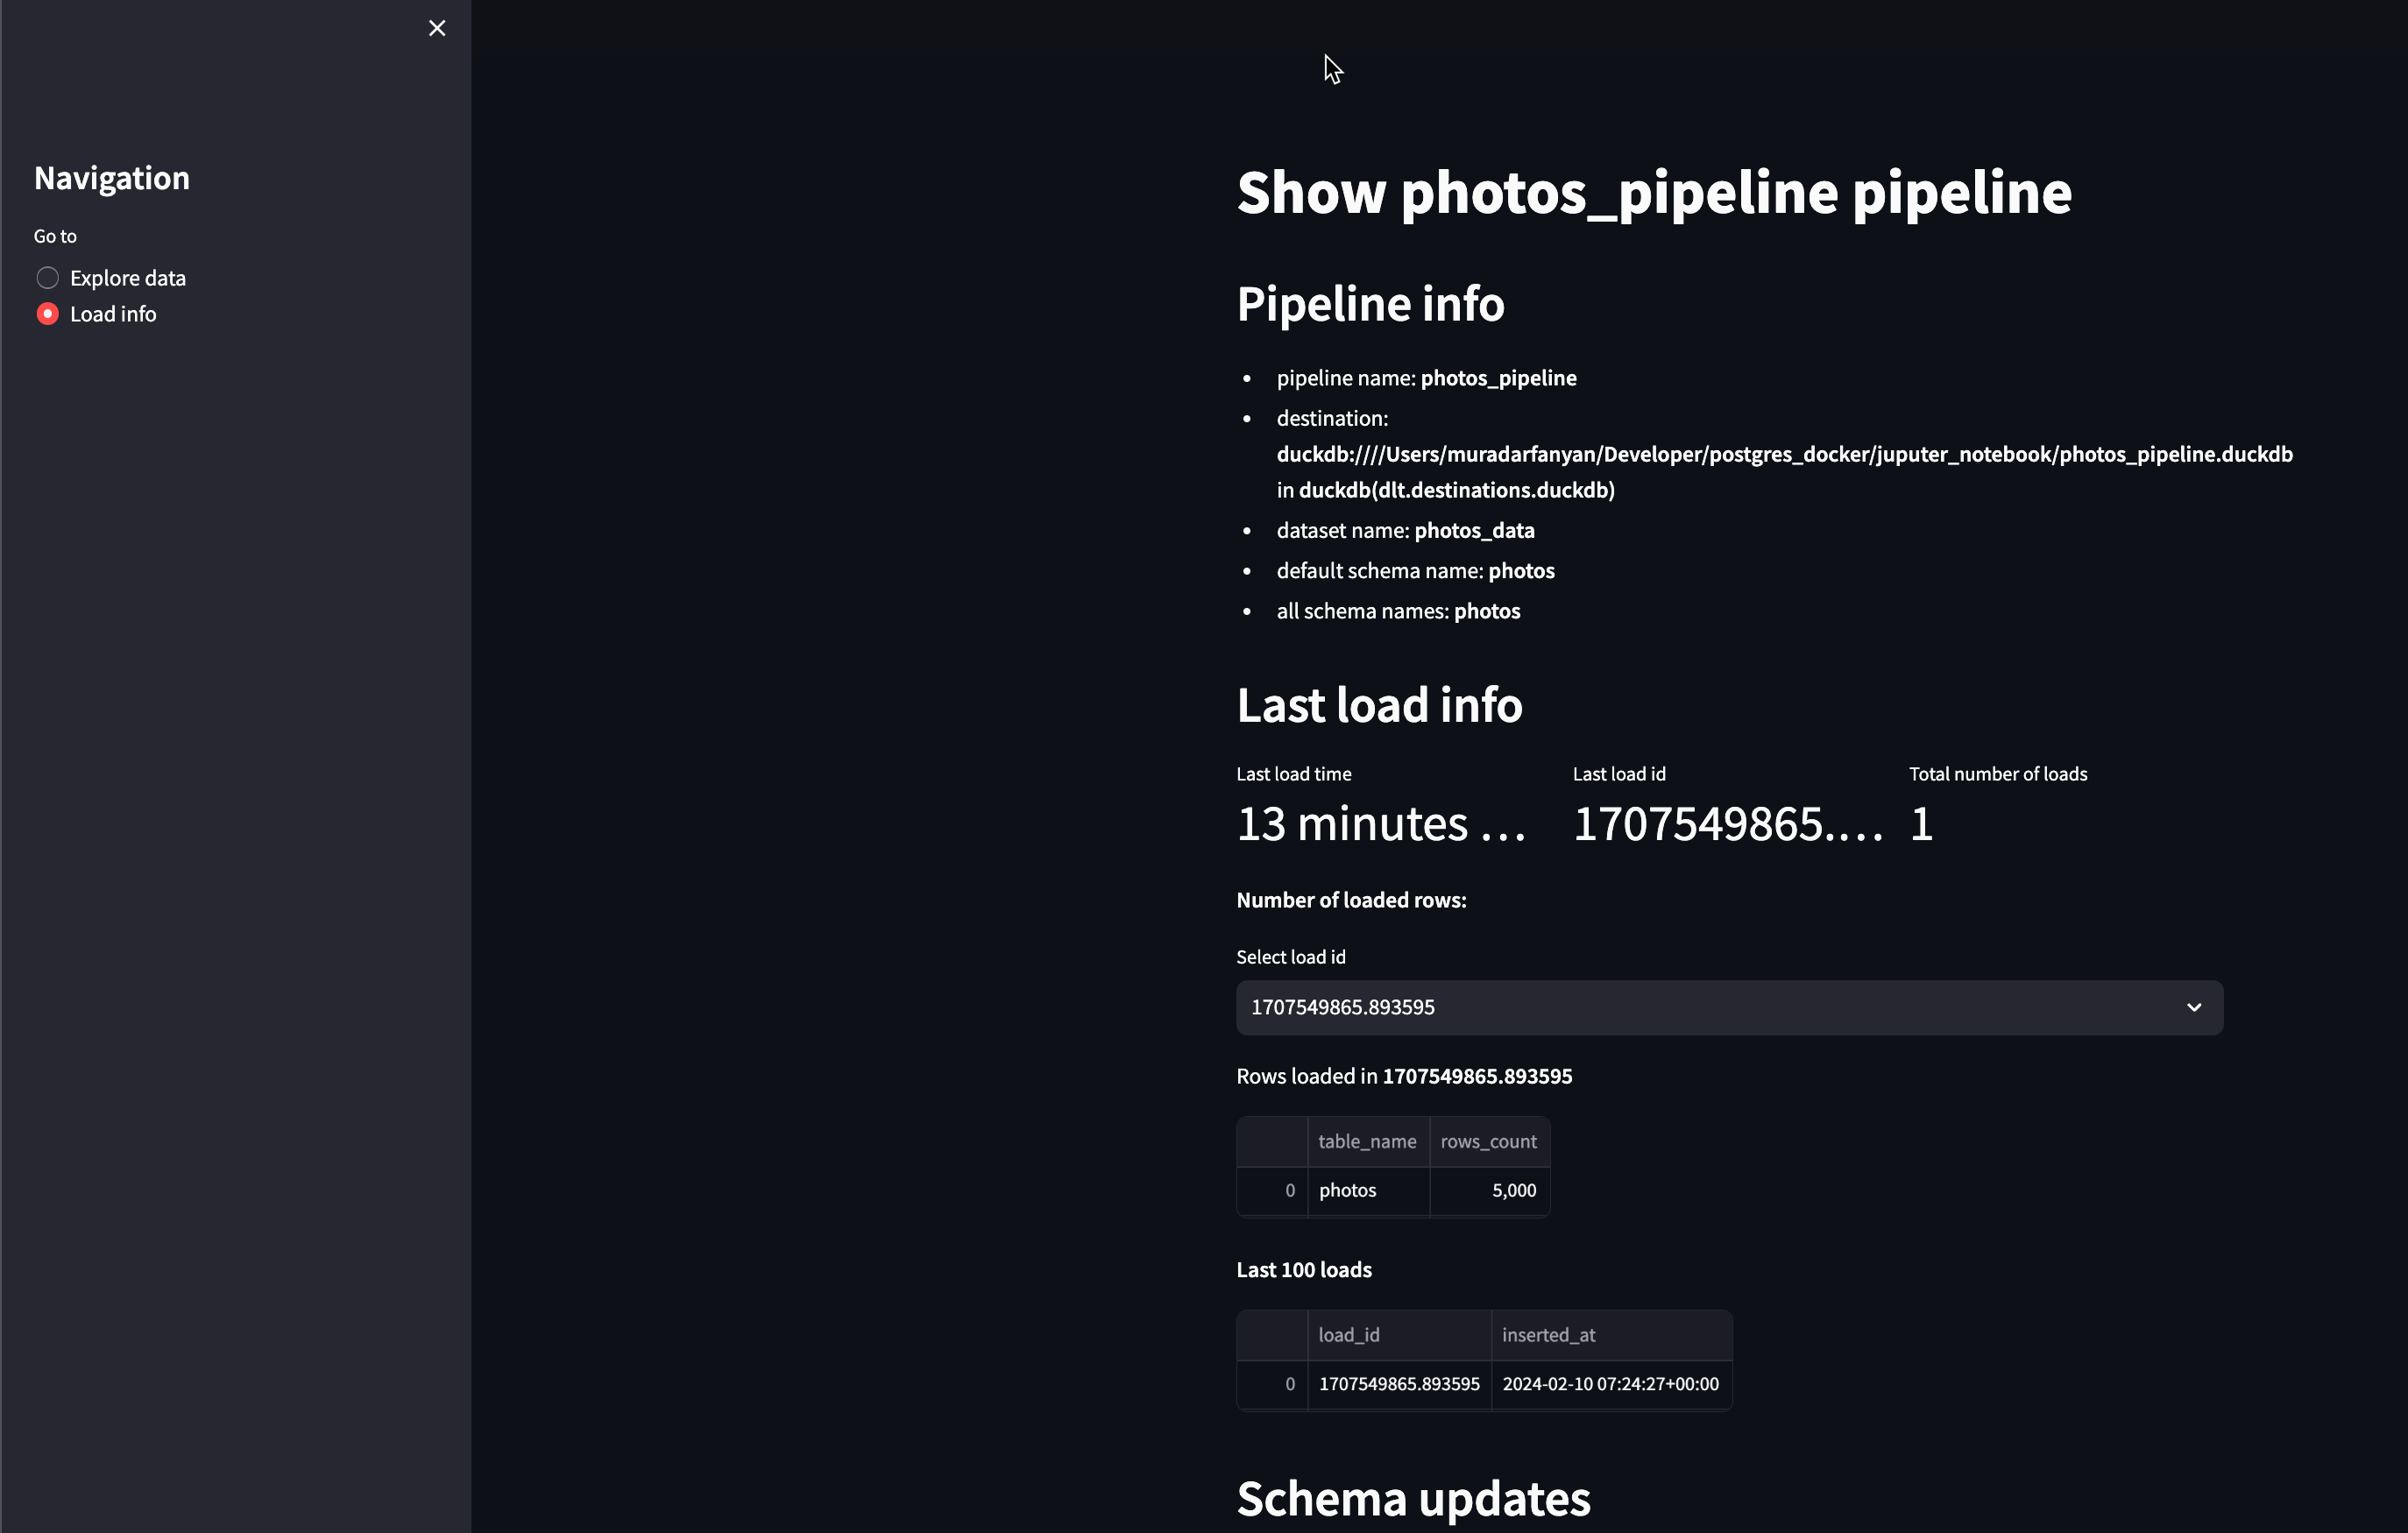

# Load to bigquery
To load to bigquery, we need credentials to bigquery.

- dlt looks for credentials in several places as described in the credential docs.
- In the case of Bigquery you can read the docs here for how to do it.
- If you are running from Colab or a GCP machine, or you are authenticated with the gcp CLI, you can use these already-available local credentials. We will use the Colab Oauth here.

In [1]:
!pip install dlt[bigquery]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.2/540.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are install

In [2]:
# Authenticate to Google BigQuery
from google.colab import auth
auth.authenticate_user()

In [11]:
import os
import dlt
from dlt.sources.helpers import requests


@dlt.resource(table_name="photos", write_disposition="replace")
def get_photos():
    url = "https://jsonplaceholder.typicode.com/photos"
    response = requests.get(url)
    response.raise_for_status()
    yield response.json()


# Set project id
os.environ['GOOGLE_CLOUD_PROJECT'] = 'ny-rides-marfanyan'


# Define your pipeline
pipeline = dlt.pipeline(
    pipeline_name='photos_pipeline',
    destination='bigquery',
    dataset_name='ny-taxi' #database
)

# Run the pipeline
load_info = pipeline.run(get_photos)

print(load_info)

from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

query = """
    SELECT *
    FROM `ny-rides-marfanyan.ny_taxi.photos` limit 5
"""

query_job = client.query(query)  # Make an API request.

print("The query data:")
for row in query_job:
    # Row values can be accessed by field name or index.
    print(row)

Pipeline photos_pipeline load step completed in 9.55 seconds
1 load package(s) were loaded to destination bigquery and into dataset ny_taxi
The bigquery destination used None@ny-rides-marfanyan location to store data
Load package 1707651484.1041617 is LOADED and contains no failed jobs
The query data:
Row((1, 1, 'accusamus beatae ad facilis cum similique qui sunt', 'https://via.placeholder.com/600/92c952', 'https://via.placeholder.com/150/92c952', '1707651484.1041617', 'x7nBo0xApcu1uw'), {'album_id': 0, 'id': 1, 'title': 2, 'url': 3, 'thumbnail_url': 4, '_dlt_load_id': 5, '_dlt_id': 6})
Row((1, 2, 'reprehenderit est deserunt velit ipsam', 'https://via.placeholder.com/600/771796', 'https://via.placeholder.com/150/771796', '1707651484.1041617', '6cFn30E3ujyVwQ'), {'album_id': 0, 'id': 1, 'title': 2, 'url': 3, 'thumbnail_url': 4, '_dlt_load_id': 5, '_dlt_id': 6})
Row((1, 3, 'officia porro iure quia iusto qui ipsa ut modi', 'https://via.placeholder.com/600/24f355', 'https://via.placeholder

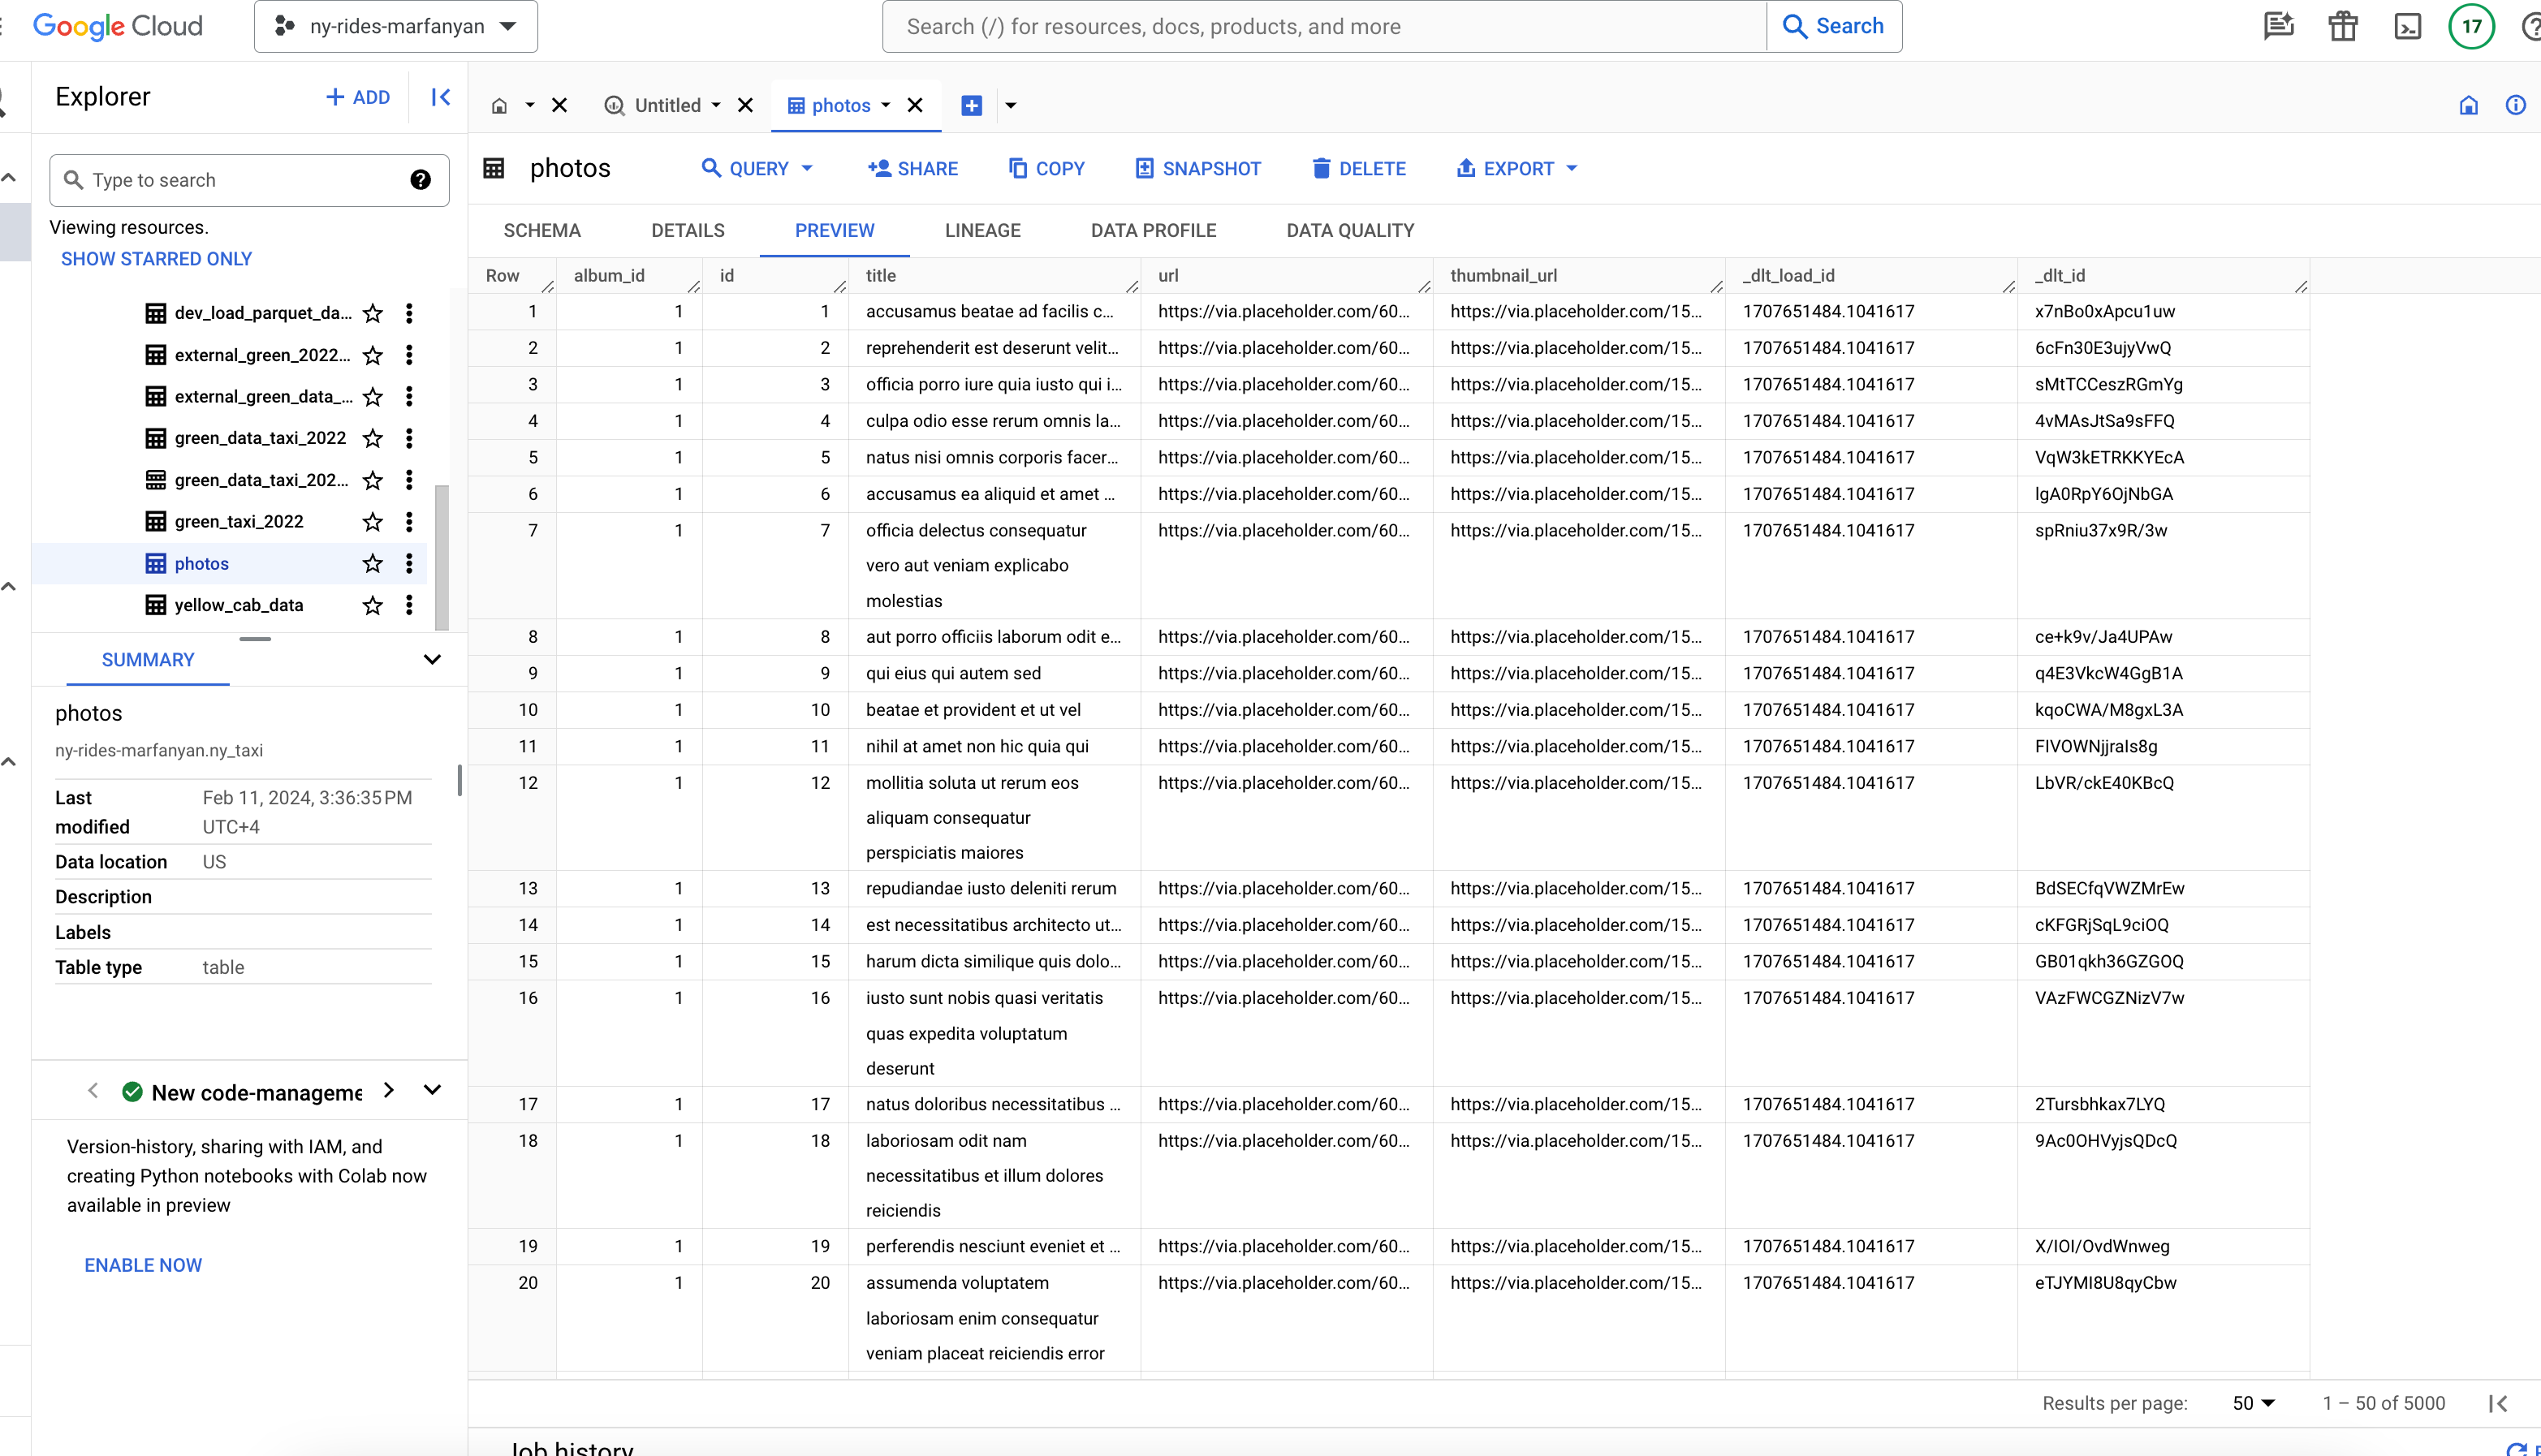